#데이터 불러오기

In [ ]:
# 현재 폴더 확인
%pwd

'/content'

In [ ]:
# 내 구글드라이브와 코랩 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 분석진행중 폴더로 이동
%cd /content/drive/Shareddrives/세번째_으싸으싸팀/분석진행중

/content/drive/Shareddrives/세번째_으싸으싸팀/분석진행중


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
from tqdm.notebook import tqdm

from matplotlib.colors import LinearSegmentedColormap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# 연관분석 데이터는 2019_Oct에서 category_code의 결측치를 삭제한 데이터셋을 사용했습니다
df = pd.read_parquet('/content/drive/Shareddrives/세번째_으싸으싸팀/분석진행중/data/박민정/df10.parquet.gzip')

In [ ]:
df.isnull().sum()

event_time              0
product_id              0
category_id             0
category_code           0
brand             2372533
price                   0
user_id                 0
user_session            2
event_cart              0
event_purchase          0
event_view              0
dtype: int64

In [ ]:
df.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_cart,event_purchase,event_view
1,2019-10-01 00:00:00 UTC,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,0,0,1
2,2019-10-01 00:00:01 UTC,17200506,2053013559792632471,furniture.living_room.sofa,None,543.099976,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,0,0,1
3,2019-10-01 00:00:01 UTC,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,0,0,1
4,2019-10-01 00:00:04 UTC,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,0,0,1
5,2019-10-01 00:00:05 UTC,1480613,2053013561092866779,computers.desktop,pulser,908.619995,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,0,0,1


# 연관성 분석

In [ ]:
df2 = df.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28933155 entries, 1 to 42448762
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   event_time      object 
 1   product_id      uint32 
 2   category_id     int64  
 3   category_code   object 
 4   brand           object 
 5   price           float32
 6   user_id         uint32 
 7   user_session    object 
 8   event_cart      uint8  
 9   event_purchase  uint8  
 10  event_view      uint8  
dtypes: float32(1), int64(1), object(4), uint32(2), uint8(3)
memory usage: 1.7+ GB


In [ ]:
# 구매한 제품들만 확인
df2 = df2.loc[df2['event_purchase']==1]
df2.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_cart,event_purchase,event_view
162,2019-10-01 00:02:14 UTC,1004856,2053013555631882655,electronics.smartphone,samsung,130.759995,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,0,1,0
308,2019-10-01 00:04:37 UTC,1002532,2053013555631882655,electronics.smartphone,apple,642.690002,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,0,1,0
442,2019-10-01 00:07:07 UTC,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.419998,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,0,1,0
574,2019-10-01 00:09:26 UTC,4804055,2053013554658804075,electronics.audio.headphone,apple,189.910004,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,0,1,0
603,2019-10-01 00:09:54 UTC,4804056,2053013554658804075,electronics.audio.headphone,apple,161.979996,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,0,1,0


In [ ]:
# user별로 어떤 카테고리를 구입했는지 묵어야 하므로 index 설정
tmp_1 = df2.set_index('user_id')
tmp_1

,event_time,product_id,category_id,category_code,brand,price,user_session,event_cart,event_purchase,event_view
user_id,,,,,,,,,,
543272936,2019-10-01 00:02:14 UTC,1004856,2053013555631882655,electronics.smartphone,samsung,130.759995,8187d148-3c41-46d4-b0c0-9c08cd9dc564,0,1,0
551377651,2019-10-01 00:04:37 UTC,1002532,2053013555631882655,electronics.smartphone,apple,642.690002,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,0,1,0
555332717,2019-10-01 00:07:07 UTC,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.419998,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,0,1,0
524601178,2019-10-01 00:09:26 UTC,4804055,2053013554658804075,electronics.audio.headphone,apple,189.910004,2af9b570-0942-4dcd-8f25-4d84fba82553,0,1,0
551377651,2019-10-01 00:09:54 UTC,4804056,2053013554658804075,electronics.audio.headphone,apple,161.979996,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,0,1,0
...,...,...,...,...,...,...,...,...,...,...
542774966,2019-10-31 23:53:53 UTC,1004767,2053013555631882655,electronics.smartphone,samsung,242.630005,957dc70c-31d3-42b7-aef0-2d2827c35251,0,1,0
514622109,2019-10-31 23:55:21 UTC,47500017,2110937143172923797,construction.tools.light,puckator,20.590000,5724116e-365b-4ac1-9d03-b8d66e1ccc7c,0,1,0
512717356,2019-10-31 23:56:03 UTC,1003306,2053013555631882655,electronics.smartphone,apple,577.890015,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b,0,1,0


In [ ]:
tmp_keys =tmp_1.index.drop_duplicates()

In [ ]:
tmp_1.loc[tmp_keys[16]]['category_code']

user_id
555110488    electronics.smartphone
555110488    electronics.smartphone
555110488    electronics.smartphone
555110488    electronics.smartphone
555110488    electronics.smartphone
555110488    electronics.smartphone
555110488    electronics.smartphone
555110488    electronics.smartphone
555110488           apparel.costume
555110488    electronics.smartphone
Name: category_code, dtype: object

In [ ]:
r_1 = tmp_1.groupby(['user_id']).apply(lambda x: ','.join(x['category_code']))
r_1

user_id
303160429                                   electronics.clocks
340041246                                 electronics.video.tv
384989212                              appliances.kitchen.oven
401021311                                 electronics.video.tv
403013066        electronics.smartphone,electronics.smartphone
                                   ...                        
566265448                                   electronics.clocks
566267483                kids.toys,computers.peripherals.mouse
566270060    electronics.smartphone,appliances.kitchen.micr...
566274637                               electronics.smartphone
566278294                               electronics.smartphone
Length: 272071, dtype: object

In [ ]:
r_2 = pd.DataFrame(r_1).reset_index().rename(columns={0:'category_code'})
r_2

,user_id,category_code
0,303160429,electronics.clocks
1,340041246,electronics.video.tv
2,384989212,appliances.kitchen.oven
3,401021311,electronics.video.tv
4,403013066,"electronics.smartphone,electronics.smartphone"
...,...,...
272066,566265448,electronics.clocks
272067,566267483,"kids.toys,computers.peripherals.mouse"
272068,566270060,"electronics.smartphone,appliances.kitchen.micr..."
272069,566274637,electronics.smartphone


In [ ]:
# category_code의 결측값 다시 한번 제거
dataset = r_2['category_code'].dropna()

In [ ]:
dataset.isnull().sum()

0

In [ ]:
dataset

0                                        electronics.clocks
1                                      electronics.video.tv
2                                   appliances.kitchen.oven
3                                      electronics.video.tv
4             electronics.smartphone,electronics.smartphone
                                ...                        
272066                                   electronics.clocks
272067                kids.toys,computers.peripherals.mouse
272068    electronics.smartphone,appliances.kitchen.micr...
272069                               electronics.smartphone
272070                               electronics.smartphone
Name: category_code, Length: 272071, dtype: object

In [ ]:
# 각 고객들의 구매이력을 ,을 기준으로 나눈뒤에 각각 리스트로 묶기
for i in range(len(dataset)):
    dataset[i] = dataset.iloc[i].split(',')
    dataset[i] = set(dataset[i]) #중복값 제거(# 1명의 user가 smartphone을 여러개 사는건 연관분석에선 크게 의미가 없기때문에)
    dataset[i] = list(dataset[i]) #다시 리스트로 만들기

In [ ]:
dataset

0                                      [electronics.clocks]
1                                    [electronics.video.tv]
2                                 [appliances.kitchen.oven]
3                                    [electronics.video.tv]
4                                  [electronics.smartphone]
                                ...                        
272066                                 [electronics.clocks]
272067             [kids.toys, computers.peripherals.mouse]
272068    [appliances.kitchen.microwave, electronics.sma...
272069                             [electronics.smartphone]
272070                             [electronics.smartphone]
Name: category_code, Length: 272071, dtype: object

In [ ]:
# 전체 데이터를 리스트로 정리
dataset = dataset.to_list()

In [ ]:
dataset

[['electronics.clocks'],
 ['electronics.video.tv'],
 ['appliances.kitchen.oven'],
 ['electronics.video.tv'],
 ['electronics.smartphone'],
 ['electronics.smartphone'],
 ['electronics.smartphone'],
 ['computers.peripherals.mouse'],
 ['computers.notebook'],
 ['electronics.smartphone'],
 ['furniture.bedroom.bed'],
 ['electronics.smartphone'],
 ['appliances.kitchen.washer'],
 ['electronics.smartphone'],
 ['electronics.smartphone'],
 ['electronics.smartphone'],
 ['appliances.kitchen.oven'],
 ['electronics.smartphone'],
 ['electronics.clocks'],
 ['electronics.smartphone'],
 ['electronics.smartphone'],
 ['electronics.smartphone'],
 ['appliances.kitchen.refrigerators'],
 ['electronics.smartphone'],
 ['electronics.smartphone'],
 ['computers.peripherals.printer'],
 ['electronics.smartphone'],
 ['electronics.smartphone'],
 ['electronics.video.tv', 'electronics.smartphone'],
 ['appliances.kitchen.toster'],
 ['electronics.smartphone'],
 ['appliances.kitchen.refrigerators'],
 ['auto.accessories.compr

In [ ]:
# 학습시작
te = TransactionEncoder()
te_result = te.fit(dataset).transform(dataset)

In [ ]:
te_result

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
df_result = pd.DataFrame(te_result, columns=te.columns_) #위에서 나온걸 보기 좋게 데이터프레임으로 변경

In [ ]:
df_result

,accessories.bag,accessories.umbrella,accessories.wallet,apparel.belt,apparel.costume,apparel.dress,apparel.jacket,apparel.jeans,apparel.jumper,apparel.scarf,...,kids.skates,kids.swing,kids.toys,medicine.tools.tonometer,sport.bicycle,sport.ski,sport.snowboard,sport.tennis,sport.trainer,stationery.cartrige
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272066,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
272067,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
272068,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
272069,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(df_result,
                            min_support=0.005, # 블로그들 참고해보니 많이들 0.005로 했길래 따라했습니다.
                            max_len = 3, # 폼목 집합 최대 개수 : 3개
                            use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending = False)

,support,itemsets
24,0.589688,(electronics.smartphone)
21,0.069195,(electronics.audio.headphone)
27,0.049531,(electronics.video.tv)
23,0.039497,(electronics.clocks)
12,0.038519,(appliances.kitchen.washer)
3,0.033782,(appliances.environment.vacuum)
18,0.033760,(computers.notebook)
11,0.028140,(appliances.kitchen.refrigerators)
33,0.015930,"(electronics.audio.headphone, electronics.smar..."
25,0.012673,(electronics.tablet)


In [ ]:
# 노션에 정리한 여러 측도들 추가하기(블로그 참고)

association_rules_df = association_rules(frequent_itemsets, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation)
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities



In [ ]:
association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,all-confidence,collective strength,cosine similarity
0,(appliances.environment.vacuum),(electronics.smartphone),0.033782,0.589688,0.005039,0.149168,0.252960,-0.014881,0.482248,{'electronics.smartphone => appliances.environ...,0.883465,0.035703
1,(electronics.smartphone),(appliances.environment.vacuum),0.589688,0.033782,0.005039,0.008545,0.252960,-0.014881,0.974546,{'electronics.smartphone => appliances.environ...,0.883465,0.035703
2,(appliances.kitchen.washer),(electronics.smartphone),0.038519,0.589688,0.006061,0.157347,0.266831,-0.016653,0.486929,{'electronics.smartphone => appliances.kitchen...,0.870423,0.040215
3,(electronics.smartphone),(appliances.kitchen.washer),0.589688,0.038519,0.006061,0.010278,0.266831,-0.016653,0.971466,{'electronics.smartphone => appliances.kitchen...,0.870423,0.040215
4,(computers.notebook),(electronics.smartphone),0.033760,0.589688,0.007803,0.231138,0.391966,-0.012105,0.533661,{'electronics.smartphone => computers.notebook...,0.904345,0.055304
5,(electronics.smartphone),(computers.notebook),0.589688,0.033760,0.007803,0.013233,0.391966,-0.012105,0.979198,{'electronics.smartphone => computers.notebook...,0.904345,0.055304
6,(electronics.audio.headphone),(electronics.smartphone),0.069195,0.589688,0.015930,0.230214,0.390399,-0.024874,0.533021,{'electronics.smartphone => electronics.audio....,0.812314,0.078860
7,(electronics.smartphone),(electronics.audio.headphone),0.589688,0.069195,0.015930,0.027014,0.390399,-0.024874,0.956647,{'electronics.smartphone => electronics.audio....,0.812314,0.078860
8,(electronics.clocks),(electronics.smartphone),0.039497,0.589688,0.009670,0.244835,0.415195,-0.013621,0.543341,{'electronics.smartphone => electronics.clocks...,0.892981,0.063364
9,(electronics.smartphone),(electronics.clocks),0.589688,0.039497,0.009670,0.016399,0.415195,-0.013621,0.976517,{'electronics.smartphone => electronics.clocks...,0.892981,0.063364


In [ ]:
max_i = 13
for i, row in association_rules_df.iterrows():
    print("Rule: " + list(row['antecedents'])[0] + " => " + list(row['consequents'])[0])
 
    print("Support: " + str(round(row['support'],2)))
 
    print("Confidence: " + str(round(row['confidence'],2)))
    print("Lift: " + str(round(row['lift'],2)))
    print("=====================================")
    if i==max_i:
        break

Rule: appliances.environment.vacuum => electronics.smartphone
Support: 0.01
Confidence: 0.15
Lift: 0.25
Rule: electronics.smartphone => appliances.environment.vacuum
Support: 0.01
Confidence: 0.01
Lift: 0.25
Rule: appliances.kitchen.washer => electronics.smartphone
Support: 0.01
Confidence: 0.16
Lift: 0.27
Rule: electronics.smartphone => appliances.kitchen.washer
Support: 0.01
Confidence: 0.01
Lift: 0.27
Rule: computers.notebook => electronics.smartphone
Support: 0.01
Confidence: 0.23
Lift: 0.39
Rule: electronics.smartphone => computers.notebook
Support: 0.01
Confidence: 0.01
Lift: 0.39
Rule: electronics.audio.headphone => electronics.smartphone
Support: 0.02
Confidence: 0.23
Lift: 0.39
Rule: electronics.smartphone => electronics.audio.headphone
Support: 0.02
Confidence: 0.03
Lift: 0.39
Rule: electronics.clocks => electronics.smartphone
Support: 0.01
Confidence: 0.24
Lift: 0.42
Rule: electronics.smartphone => electronics.clocks
Support: 0.01
Confidence: 0.02
Lift: 0.42
Rule: electronic

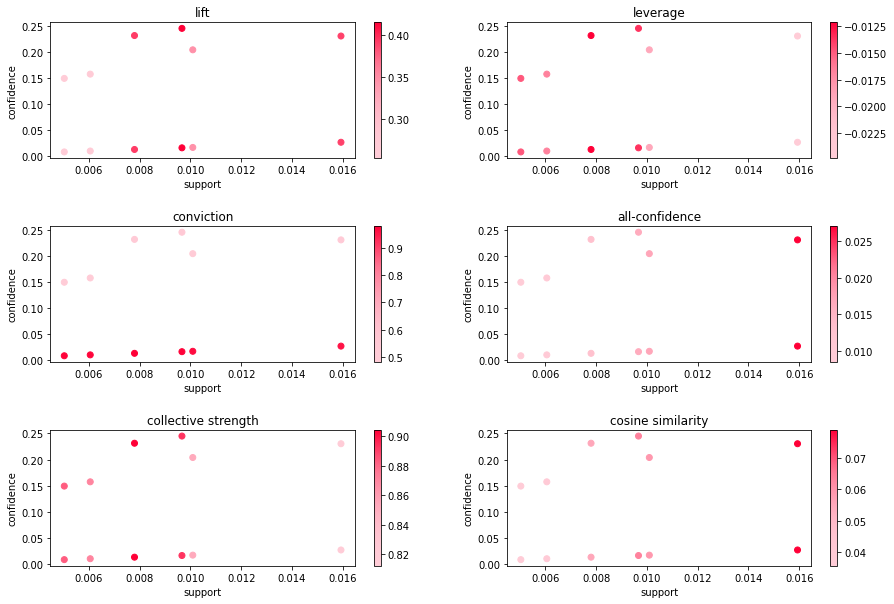

In [ ]:
support = association_rules_df['support']
confidence = association_rules_df['confidence']
 
h = 347
s = 1
v = 1
colors = [
    mcl.hsv_to_rgb((h/360, 0.2, v)),
    mcl.hsv_to_rgb((h/360, 0.55, v)),
    mcl.hsv_to_rgb((h/360, 1, v))
]
cmap = LinearSegmentedColormap.from_list('my_cmap',colors,gamma=2)
 
measures = ['lift', 'leverage', 'conviction', 
            'all-confidence', 'collective strength', 'cosine similarity']
 
fig = plt.figure(figsize=(15,10))
fig.set_facecolor('white')
for i, measure in enumerate(measures):
    ax = fig.add_subplot(320+i+1)
    if measure != 'all-confidence':
        scatter = ax.scatter(support,confidence,c=association_rules_df[measure],cmap=cmap)
    else:
        scatter = ax.scatter(support,confidence,c=association_rules_df['all-confidence'].map(lambda x: [v for k,v in x.items()][0]),cmap=cmap)
    ax.set_xlabel('support')
    ax.set_ylabel('confidence')
    ax.set_title(measure)
    
    fig.colorbar(scatter,ax=ax)
fig.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# lift 값이 최소 1이상인 연관관계 출력 -> 없음ㅠㅠ
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


##  purchase 데이터 말고 view 데이터로 하면 어떻게 나올까?

In [ ]:
df3 = df.copy()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28933155 entries, 1 to 42448762
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   event_time      object 
 1   product_id      uint32 
 2   category_id     int64  
 3   category_code   object 
 4   brand           object 
 5   price           float32
 6   user_id         uint32 
 7   user_session    object 
 8   event_cart      uint8  
 9   event_purchase  uint8  
 10  event_view      uint8  
dtypes: float32(1), int64(1), object(4), uint32(2), uint8(3)
memory usage: 1.7+ GB


In [ ]:
# view 제품들만 확인
df3 = df3.loc[df3['event_view']==1]
df3.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_cart,event_purchase,event_view
1,2019-10-01 00:00:00 UTC,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,0,0,1
2,2019-10-01 00:00:01 UTC,17200506,2053013559792632471,furniture.living_room.sofa,None,543.099976,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,0,0,1
3,2019-10-01 00:00:01 UTC,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,0,0,1
4,2019-10-01 00:00:04 UTC,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,0,0,1
5,2019-10-01 00:00:05 UTC,1480613,2053013561092866779,computers.desktop,pulser,908.619995,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,0,0,1


In [ ]:
# user별로 어떤 카테고리를 방문했는지 묶어야 하므로 index 설정
tmp_1 = df3.set_index('user_id')
tmp_1

,event_time,product_id,category_id,category_code,brand,price,user_session,event_cart,event_purchase,event_view
user_id,,,,,,,,,,
554748717,2019-10-01 00:00:00 UTC,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,9333dfbd-b87a-4708-9857-6336556b0fcc,0,0,1
519107250,2019-10-01 00:00:01 UTC,17200506,2053013559792632471,furniture.living_room.sofa,None,543.099976,566511c2-e2e3-422b-b695-cf8e6e792ca8,0,0,1
550050854,2019-10-01 00:00:01 UTC,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,7c90fc70-0e80-4590-96f3-13c02c18c713,0,0,1
535871217,2019-10-01 00:00:04 UTC,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,0,0,1
512742880,2019-10-01 00:00:05 UTC,1480613,2053013561092866779,computers.desktop,pulser,908.619995,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,0,0,1
...,...,...,...,...,...,...,...,...,...,...
518956209,2019-10-31 23:59:58 UTC,1004870,2053013555631882655,electronics.smartphone,samsung,275.250000,6764041a-9285-4869-8a32-a79adf31d212,0,0,1
524356542,2019-10-31 23:59:58 UTC,2702331,2053013563911439225,appliances.kitchen.refrigerators,lg,527.429993,153f9818-4d32-4e8b-ba9f-f355094e8ae4,0,0,1
537931532,2019-10-31 23:59:58 UTC,2300275,2053013560530830019,electronics.camera.video,gopro,527.400024,22c57267-da98-4f28-9a9c-18bb5b385193,0,0,1


In [ ]:
tmp_keys =tmp_1.index.drop_duplicates()

In [ ]:
tmp_1.loc[tmp_keys[16]]['category_code']

'appliances.environment.air_heater'

In [ ]:
r_1 = tmp_1.groupby(['user_id']).apply(lambda x: ','.join(x['category_code']))

In [ ]:
r_2 = pd.DataFrame(r_1).reset_index().rename(columns={0:'category_code'})

In [ ]:
# category_code의 결측값 다시 한번 제거
dataset = r_2['category_code'].dropna()

In [ ]:
dataset.isnull().sum()

0

In [ ]:
dataset

0                                              kids.carriage
1          furniture.living_room.chair,furniture.living_r...
2                                electronics.audio.headphone
3          computers.components.videocards,computers.comp...
4                                          kids.fmcg.diapers
                                 ...                        
2407986    auto.accessories.player,auto.accessories.playe...
2407987                           furniture.living_room.sofa
2407988        electronics.smartphone,electronics.smartphone
2407989                                furniture.bedroom.bed
2407990                             electronics.camera.video
Name: category_code, Length: 2407991, dtype: object

In [ ]:
# 각 고객들의 구매이력을 ,을 기준으로 나눈뒤에 각각 리스트로 묶기
for i in range(len(dataset)):
    dataset[i] = dataset.iloc[i].split(',')
    dataset[i] = set(dataset[i]) #중복값 제거(# 1명의 user가 smartphone을 여러개 사는건 연관분석에선 크게 의미가 없기때문에)
    dataset[i] = list(dataset[i]) #다시 리스트로 만들기

In [ ]:
# 전체 데이터를 리스트로 정리
dataset = dataset.to_list()

In [ ]:
dataset

[['kids.carriage'],
 ['furniture.living_room.chair'],
 ['electronics.audio.headphone'],
 ['computers.components.motherboard', 'computers.components.videocards'],
 ['kids.fmcg.diapers'],
 ['sport.trainer', 'appliances.personal.hair_cutter'],
 ['furniture.bedroom.bed'],
 ['kids.carriage'],
 ['furniture.bedroom.bed'],
 ['kids.toys'],
 ['kids.fmcg.diapers'],
 ['electronics.telephone'],
 ['electronics.video.tv', 'electronics.smartphone'],
 ['electronics.smartphone'],
 ['electronics.smartphone'],
 ['appliances.kitchen.blender', 'electronics.telephone'],
 ['electronics.smartphone'],
 ['kids.carriage'],
 ['electronics.tablet', 'electronics.clocks', 'electronics.audio.headphone'],
 ['electronics.smartphone'],
 ['electronics.smartphone'],
 ['appliances.environment.air_heater'],
 ['auto.accessories.player', 'electronics.smartphone'],
 ['electronics.audio.headphone'],
 ['electronics.smartphone'],
 ['computers.desktop', 'appliances.kitchen.hob', 'appliances.kitchen.hood'],
 ['electronics.tablet'],


In [ ]:
# 학습시작
te = TransactionEncoder()
te_result = te.fit(dataset).transform(dataset)

In [ ]:
te_result

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
df_result = pd.DataFrame(te_result, columns=te.columns_) #위에서 나온걸 보기 좋게 데이터프레임으로 변경

In [ ]:
df_result

,accessories.bag,accessories.umbrella,accessories.wallet,apparel.belt,apparel.costume,apparel.dress,apparel.jacket,apparel.jeans,apparel.jumper,apparel.scarf,...,kids.skates,kids.swing,kids.toys,medicine.tools.tonometer,sport.bicycle,sport.ski,sport.snowboard,sport.tennis,sport.trainer,stationery.cartrige
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407986,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2407987,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2407988,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2407989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(df_result,
                            min_support=0.005, # 블로그들 참고해보니 많이들 0.005로 했길래 따라했습니다.
                            max_len = 3, # 폼목 집합 최대 개수 : 3개
                            use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending = False)

,support,itemsets
46,0.539898,(electronics.smartphone)
43,0.088849,(electronics.audio.headphone)
45,0.088008,(electronics.clocks)
49,0.070617,(electronics.video.tv)
23,0.054829,(appliances.kitchen.washer)
...,...,...
24,0.005124,(appliances.personal.hair_cutter)
109,0.005075,"(sport.bicycle, electronics.smartphone)"
95,0.005051,"(electronics.audio.acoustic, electronics.smart..."
108,0.005029,"(kids.toys, electronics.smartphone)"


In [ ]:
# 노션에 정리한 여러 측도들 추가하기(블로그 참고)

association_rules_df = association_rules(frequent_itemsets, 
                                         metric='confidence', 
                                         min_threshold=0.005,
                                        )
all_confidences = []
collective_strengths = []
cosine_similarities = []
for _,row in association_rules_df.iterrows():
    all_confidence_if = list(row['antecedents'])[0]
    all_confidence_then = list(row['consequents'])[0]
    if row['antecedent support'] <= row['consequent support']:
        all_confidence_if = list(row['consequents'])[0]
        all_confidence_then = list(row['antecedents'])[0]
    all_confidence = {all_confidence_if+' => '+all_confidence_then : \
                      row['support']/max(row['antecedent support'], row['consequent support'])}
    all_confidences.append(all_confidence)
    
    violation = row['antecedent support'] + row['consequent support'] - 2*row['support']
    ex_violation = 1-row['antecedent support']*row['consequent support'] - \
                    (1-row['antecedent support'])*(1-row['consequent support'])
    collective_strength = (1-violation)/(1-ex_violation)*(ex_violation/violation)
    collective_strengths.append(collective_strength)
    
    cosine_similarity = row['support']/np.sqrt(row['antecedent support']*row['consequent support'])
    cosine_similarities.append(cosine_similarity)
    
association_rules_df['all-confidence'] = all_confidences
association_rules_df['collective strength'] = collective_strengths
association_rules_df['cosine similarity'] = cosine_similarities



In [ ]:
association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,all-confidence,collective strength,cosine similarity
0,(accessories.bag),(electronics.smartphone),0.018596,0.539898,0.007889,0.424207,0.785717,-0.002151,0.799075,{'electronics.smartphone => accessories.bag': ...,0.982824,0.078729
1,(electronics.smartphone),(accessories.bag),0.539898,0.018596,0.007889,0.014612,0.785717,-0.002151,0.995956,{'electronics.smartphone => accessories.bag': ...,0.982824,0.078729
2,(apparel.shoes),(apparel.costume),0.052641,0.023135,0.006031,0.114563,4.952010,0.004813,1.103258,{'apparel.shoes => apparel.costume': 0.1145629...,1.163034,0.172813
3,(apparel.costume),(apparel.shoes),0.023135,0.052641,0.006031,0.260681,4.952010,0.004813,1.281393,{'apparel.shoes => apparel.costume': 0.1145629...,1.163034,0.172813
4,(apparel.costume),(electronics.smartphone),0.023135,0.539898,0.009396,0.406136,0.752245,-0.003095,0.774759,{'electronics.smartphone => apparel.costume': ...,0.975383,0.084071
...,...,...,...,...,...,...,...,...,...,...,...,...
127,"(electronics.video.tv, electronics.smartphone)",(electronics.clocks),0.028206,0.088008,0.005230,0.185424,2.106904,0.002748,1.119591,{'electronics.clocks => electronics.video.tv':...,1.058469,0.104973
128,"(electronics.clocks, electronics.smartphone)",(electronics.video.tv),0.040721,0.070617,0.005230,0.128436,1.818774,0.002354,1.066339,{'electronics.video.tv => electronics.clocks':...,1.052190,0.097531
129,(electronics.video.tv),"(electronics.clocks, electronics.smartphone)",0.070617,0.040721,0.005230,0.074063,1.818774,0.002354,1.036009,{'electronics.video.tv => electronics.clocks':...,1.052190,0.097531
130,(electronics.clocks),"(electronics.video.tv, electronics.smartphone)",0.088008,0.028206,0.005230,0.059428,2.106904,0.002748,1.033194,{'electronics.clocks => electronics.video.tv':...,1.058469,0.104973


In [ ]:
max_i = 13
for i, row in association_rules_df.iterrows():
    print("Rule: " + list(row['antecedents'])[0] + " => " + list(row['consequents'])[0])
 
    print("Support: " + str(round(row['support'],2)))
 
    print("Confidence: " + str(round(row['confidence'],2)))
    print("Lift: " + str(round(row['lift'],2)))
    print("=====================================")
    if i==max_i:
        break

Rule: accessories.bag => electronics.smartphone
Support: 0.01
Confidence: 0.42
Lift: 0.79
Rule: electronics.smartphone => accessories.bag
Support: 0.01
Confidence: 0.01
Lift: 0.79
Rule: apparel.shoes => apparel.costume
Support: 0.01
Confidence: 0.11
Lift: 4.95
Rule: apparel.costume => apparel.shoes
Support: 0.01
Confidence: 0.26
Lift: 4.95
Rule: apparel.costume => electronics.smartphone
Support: 0.01
Confidence: 0.41
Lift: 0.75
Rule: electronics.smartphone => apparel.costume
Support: 0.01
Confidence: 0.02
Lift: 0.75
Rule: apparel.jeans => electronics.smartphone
Support: 0.01
Confidence: 0.41
Lift: 0.77
Rule: electronics.smartphone => apparel.jeans
Support: 0.01
Confidence: 0.01
Lift: 0.77
Rule: apparel.shoes => apparel.shoes.keds
Support: 0.02
Confidence: 0.3
Lift: 7.82
Rule: apparel.shoes.keds => apparel.shoes
Support: 0.02
Confidence: 0.41
Lift: 7.82
Rule: apparel.shoes => electronics.clocks
Support: 0.01
Confidence: 0.13
Lift: 1.45
Rule: electronics.clocks => apparel.shoes
Support: 

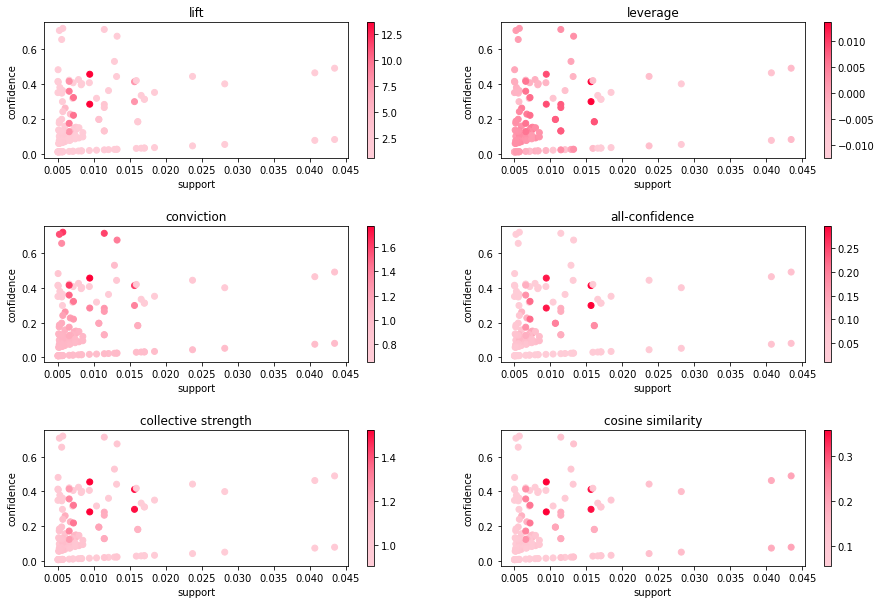

In [ ]:
support = association_rules_df['support']
confidence = association_rules_df['confidence']
 
h = 347
s = 1
v = 1
colors = [
    mcl.hsv_to_rgb((h/360, 0.2, v)),
    mcl.hsv_to_rgb((h/360, 0.55, v)),
    mcl.hsv_to_rgb((h/360, 1, v))
]
cmap = LinearSegmentedColormap.from_list('my_cmap',colors,gamma=2)
 
measures = ['lift', 'leverage', 'conviction', 
            'all-confidence', 'collective strength', 'cosine similarity']
 
fig = plt.figure(figsize=(15,10))
fig.set_facecolor('white')
for i, measure in enumerate(measures):
    ax = fig.add_subplot(320+i+1)
    if measure != 'all-confidence':
        scatter = ax.scatter(support,confidence,c=association_rules_df[measure],cmap=cmap)
    else:
        scatter = ax.scatter(support,confidence,c=association_rules_df['all-confidence'].map(lambda x: [v for k,v in x.items()][0]),cmap=cmap)
    ax.set_xlabel('support')
    ax.set_ylabel('confidence')
    ax.set_title(measure)
    
    fig.colorbar(scatter,ax=ax)
fig.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# lift 값이 최소 1이상인 연관관계 출력 
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(apparel.shoes),(apparel.costume),0.052641,0.023135,0.006031,0.114563,4.952010,0.004813,1.103258
1,(apparel.costume),(apparel.shoes),0.023135,0.052641,0.006031,0.260681,4.952010,0.004813,1.281393
2,(apparel.shoes),(apparel.shoes.keds),0.052641,0.038048,0.015667,0.297625,7.822303,0.013665,1.369571
3,(apparel.shoes.keds),(apparel.shoes),0.038048,0.052641,0.015667,0.411777,7.822303,0.013665,1.610543
4,(apparel.shoes),(electronics.clocks),0.052641,0.088008,0.006710,0.127461,1.448296,0.002077,1.045217
...,...,...,...,...,...,...,...,...,...
69,"(electronics.video.tv, electronics.smartphone)",(electronics.clocks),0.028206,0.088008,0.005230,0.185424,2.106904,0.002748,1.119591
70,"(electronics.clocks, electronics.smartphone)",(electronics.video.tv),0.040721,0.070617,0.005230,0.128436,1.818774,0.002354,1.066339
71,(electronics.video.tv),"(electronics.clocks, electronics.smartphone)",0.070617,0.040721,0.005230,0.074063,1.818774,0.002354,1.036009
72,(electronics.clocks),"(electronics.video.tv, electronics.smartphone)",0.088008,0.028206,0.005230,0.059428,2.106904,0.002748,1.033194


In [ ]:
asso_result = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
asso_result.to_csv('/content/drive/Shareddrives/세번째_으싸으싸팀/분석진행중/data/박민정/연관분석view_결과.csv',index=False)

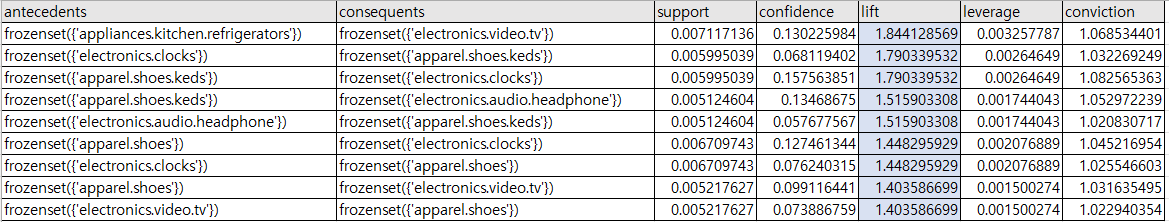

- 대부분 스마트폰을 보면 전자제품 악세서리를 본다등의 뻔한(?) 연관성이 나타남

- 눈에 제일 띄는 점은 전자제품과의 신발의 연관성

- 웹쇼핑몰에서 신발을 보는 사람들에게 전자제품도 같이 추천하는 전략을 세워볼 수 있음  
(반대도 가능: 전자제품을 보는 사람들에게 팝업창으로 신발 제품들을 추천해볼 수 있음)

### 브랜드 연관성도 확인해볼까?
- 일단 RFM 먼저 해보기